# TF Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
# df.isnull() 
# it gives us true if there is any null data in dt and false if not 

In [7]:
# this would give us results as 0 and 1 , if 0 then no null if then then null value exists

df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


c:\users\ranjit thakur\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

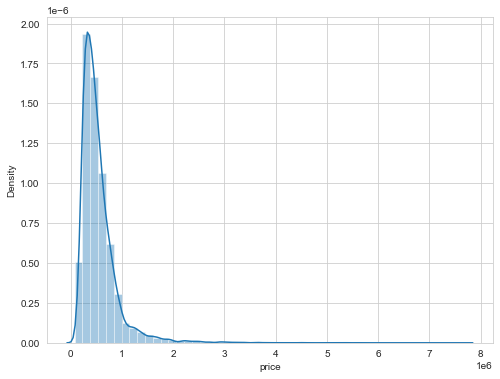

In [12]:
plt.figure(figsize= (8,6))
sns.set_style('whitegrid')
sns.distplot(df['price'])

c:\users\ranjit thakur\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

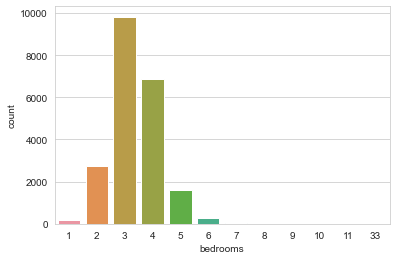

In [13]:
sns.countplot(df['bedrooms'])

In [17]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

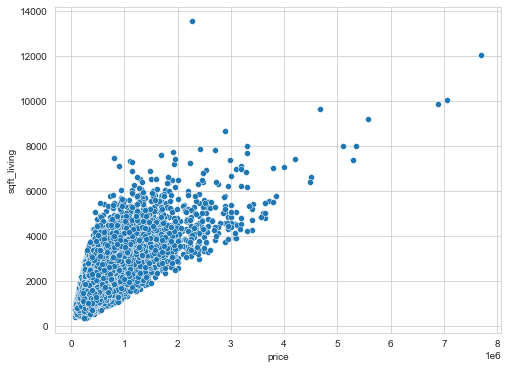

In [19]:
plt.figure(figsize= (8,6))
sns.scatterplot(x='price',y='sqft_living',data = df)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

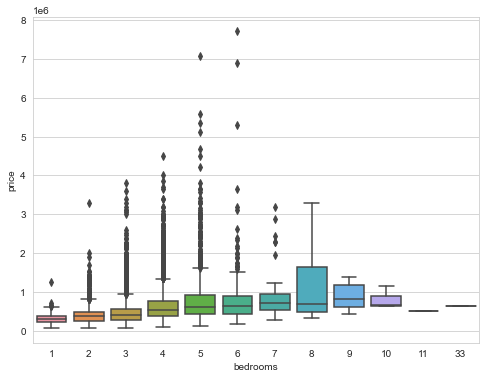

In [23]:
plt.figure(figsize= (8,6))
sns.boxplot(y='price',x='bedrooms',data = df)

<AxesSubplot:xlabel='price', ylabel='long'>

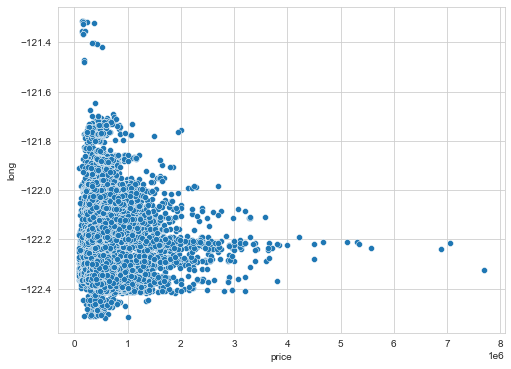

In [26]:
plt.figure(figsize= (8,6))
sns.scatterplot(x='price',y='long',data = df)

<AxesSubplot:xlabel='price', ylabel='lat'>

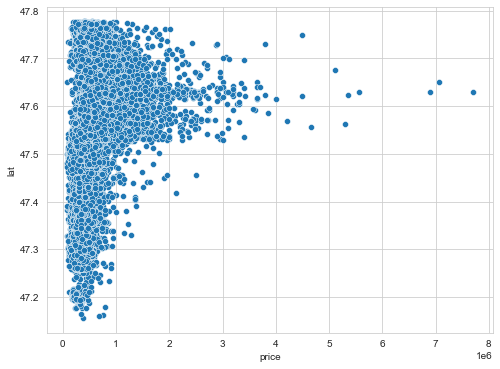

In [27]:
plt.figure(figsize= (8,6))
sns.scatterplot(x='price',y='lat',data = df)

<AxesSubplot:xlabel='long', ylabel='lat'>

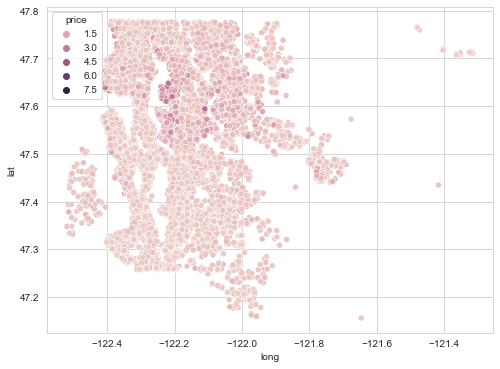

In [29]:
plt.figure(figsize= (8,6))
sns.scatterplot(x='long',y='lat',data = df,hue = 'price')

In [31]:
df.sort_values('price',ascending = False).head(25)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [33]:
# here we are calculating teh 1 % length of data to avoid some outliers to get proper corr with lat , long

len(df)*0.01

215.97

In [34]:
except_outlier = df.sort_values('price',ascending = False).iloc[216:]

In [35]:
except_outlier

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6329,824059321,6/2/2014,1970000.0,4,3.50,4370,8510,2.0,0,1,...,10,3610,760,2003,0,98004,47.5876,-122.204,2960,10347
12271,1923000260,10/15/2014,1960000.0,5,4.50,6200,23373,3.0,0,1,...,11,5050,1150,1988,0,98040,47.5632,-122.215,3700,14486
9166,3124059023,2/13/2015,1960000.0,3,1.75,3330,12566,1.0,1,4,...,8,1940,1390,1960,0,98040,47.5287,-122.220,3730,16560
12565,2806300065,4/22/2015,1960000.0,4,4.00,4430,31353,2.0,0,0,...,12,4430,0,1998,0,98005,47.6422,-122.157,3900,35237
1150,4055701200,4/21/2015,1960000.0,4,2.75,3120,7898,1.0,1,4,...,8,1560,1560,1963,0,98034,47.7165,-122.259,2630,13868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,1623049041,5/8/2014,82500.0,2,1.00,520,22334,1.0,0,0,...,5,520,0,1951,0,98168,47.4799,-122.296,1572,10570
8267,3883800011,11/5/2014,82000.0,3,1.00,860,10426,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250
16184,3028200080,3/24/2015,81000.0,2,1.00,730,9975,1.0,0,0,...,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
465,8658300340,5/23/2014,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500


<AxesSubplot:xlabel='long', ylabel='lat'>

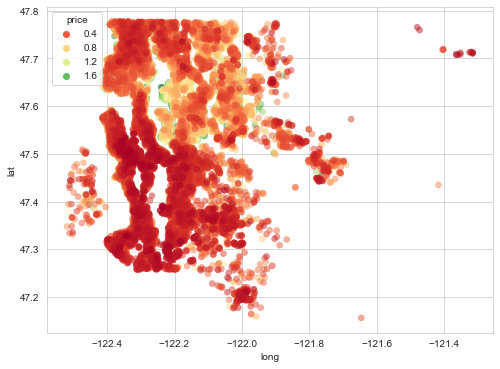

In [38]:
plt.figure(figsize= (8,6))
sns.scatterplot(x='long',y='lat',data = except_outlier,edgecolor = None, alpha = 0.5 , palette = 'RdYlGn' , hue = 'price')

<AxesSubplot:xlabel='waterfront', ylabel='price'>

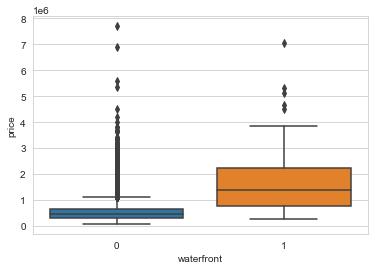

In [39]:
sns.boxplot(x = 'waterfront' , y = 'price', data = df)

In [40]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [42]:
df = df.drop('id',axis=1)

In [44]:
df['date'] = pd.to_datetime(df['date'])

In [45]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [46]:
df['year'] = df['date'].apply(lambda date : date.year)
df['month'] = df['date'].apply(lambda date : date.month)

In [47]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


<AxesSubplot:xlabel='month', ylabel='price'>

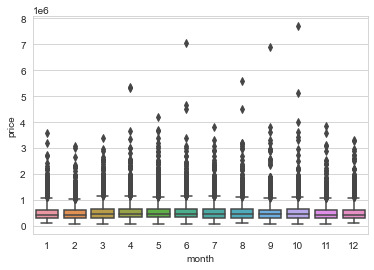

In [48]:
sns.boxplot(x = 'month' , y = 'price' , data = df)

<AxesSubplot:xlabel='month'>

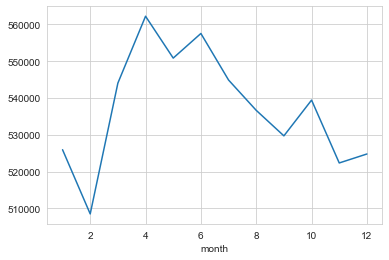

In [52]:
df.groupby('month').mean()['price'].plot()

<AxesSubplot:xlabel='year'>

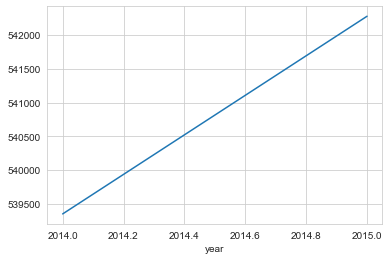

In [53]:
df.groupby('year').mean()['price'].plot()

In [54]:
df = df.drop('date', axis=1)

In [55]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [56]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [57]:
df = df.drop('zipcode',axis=1)

In [58]:
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [59]:
df['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

In [60]:
X = df.drop('price', axis = 1).values
y = df['price'].values

In [61]:
from sklearn.model_selection import  train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [63]:
from sklearn.preprocessing import MinMaxScaler

In [64]:
scaler = MinMaxScaler()

In [65]:
X_train = scaler.fit_transform(X_train) # here we rae fitting and transforiming our train datas at one step only 

In [66]:
X_test = scaler.transform(X_test) # here its a test data so we wont fit it

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [68]:
X_train.shape

(15117, 19)

In [70]:
model = Sequential()

model.add(Dense(19,activation = 'relu'))
model.add(Dense(19,activation = 'relu'))
model.add(Dense(19,activation = 'relu'))
model.add(Dense(19,activation = 'relu'))


model.add(Dense(1))

model.compile(optimizer= 'adam' , loss = 'mse')


In [72]:
model.fit(x = X_train , y = y_train, validation_data = (X_test,y_test),batch_size= 130,
    epochs=400)
    

Epoch 1/400
117/117 [==============================] - 1s 5ms/step - loss: 193861844992.0000 - val_loss: 122109714432.0000
Epoch 2/400
117/117 [==============================] - 0s 3ms/step - loss: 107247640576.0000 - val_loss: 96202825728.0000
Epoch 3/400
117/117 [==============================] - 0s 3ms/step - loss: 98785099776.0000 - val_loss: 94628331520.0000
Epoch 4/400
117/117 [==============================] - 0s 3ms/step - loss: 97051172864.0000 - val_loss: 93011017728.0000
Epoch 5/400
117/117 [==============================] - 0s 3ms/step - loss: 95350013952.0000 - val_loss: 91334524928.0000
Epoch 6/400
117/117 [==============================] - 0s 3ms/step - loss: 93617225728.0000 - val_loss: 89697419264.0000
Epoch 7/400
117/117 [==============================] - 0s 3ms/step - loss: 91808169984.0000 - val_loss: 87901519872.0000
Epoch 8/400
117/117 [==============================] - 0s 3ms/step - loss: 89940713472.0000 - val_loss: 86197116928.0000
Epoch 9/400
117/117 [========

117/117 [==============================] - 0s 3ms/step - loss: 37221384192.0000 - val_loss: 35949752320.0000
Epoch 69/400
117/117 [==============================] - 0s 3ms/step - loss: 37077078016.0000 - val_loss: 35737497600.0000
Epoch 70/400
117/117 [==============================] - 0s 3ms/step - loss: 36898570240.0000 - val_loss: 35623112704.0000
Epoch 71/400
117/117 [==============================] - 0s 3ms/step - loss: 36737839104.0000 - val_loss: 35482370048.0000
Epoch 72/400
117/117 [==============================] - 0s 3ms/step - loss: 36601192448.0000 - val_loss: 35291148288.0000
Epoch 73/400
117/117 [==============================] - 0s 3ms/step - loss: 36443447296.0000 - val_loss: 35137794048.0000
Epoch 74/400
117/117 [==============================] - 0s 3ms/step - loss: 36334899200.0000 - val_loss: 34999599104.0000
Epoch 75/400
117/117 [==============================] - 0s 3ms/step - loss: 36195467264.0000 - val_loss: 34924179456.0000
Epoch 76/400
117/117 [===============

117/117 [==============================] - 0s 3ms/step - loss: 32721590272.0000 - val_loss: 31140386816.0000
Epoch 135/400
117/117 [==============================] - 0s 3ms/step - loss: 32703281152.0000 - val_loss: 31149328384.0000
Epoch 136/400
117/117 [==============================] - 0s 3ms/step - loss: 32674457600.0000 - val_loss: 31052591104.0000
Epoch 137/400
117/117 [==============================] - 0s 3ms/step - loss: 32614002688.0000 - val_loss: 30987417600.0000
Epoch 138/400
117/117 [==============================] - 0s 3ms/step - loss: 32624730112.0000 - val_loss: 31101706240.0000
Epoch 139/400
117/117 [==============================] - 0s 3ms/step - loss: 32561887232.0000 - val_loss: 31041437696.0000
Epoch 140/400
117/117 [==============================] - 0s 3ms/step - loss: 32547178496.0000 - val_loss: 30875449344.0000
Epoch 141/400
117/117 [==============================] - 0s 3ms/step - loss: 32484478976.0000 - val_loss: 30868482048.0000
Epoch 142/400
117/117 [=======

117/117 [==============================] - 0s 3ms/step - loss: 31203717120.0000 - val_loss: 29296525312.0000
Epoch 201/400
117/117 [==============================] - 0s 3ms/step - loss: 31163344896.0000 - val_loss: 29274138624.0000
Epoch 202/400
117/117 [==============================] - 0s 3ms/step - loss: 31179268096.0000 - val_loss: 29256232960.0000
Epoch 203/400
117/117 [==============================] - 0s 3ms/step - loss: 31133896704.0000 - val_loss: 29223698432.0000
Epoch 204/400
117/117 [==============================] - 0s 3ms/step - loss: 31110471680.0000 - val_loss: 29282473984.0000
Epoch 205/400
117/117 [==============================] - 0s 3ms/step - loss: 31086450688.0000 - val_loss: 29179545600.0000
Epoch 206/400
117/117 [==============================] - 0s 3ms/step - loss: 31056556032.0000 - val_loss: 29322627072.0000
Epoch 207/400
117/117 [==============================] - 0s 3ms/step - loss: 31128616960.0000 - val_loss: 29161848832.0000
Epoch 208/400
117/117 [=======

117/117 [==============================] - 0s 3ms/step - loss: 30189207552.0000 - val_loss: 28038719488.0000
Epoch 267/400
117/117 [==============================] - 0s 3ms/step - loss: 30162774016.0000 - val_loss: 27999563776.0000
Epoch 268/400
117/117 [==============================] - 0s 3ms/step - loss: 30102548480.0000 - val_loss: 27981973504.0000
Epoch 269/400
117/117 [==============================] - 0s 3ms/step - loss: 30109288448.0000 - val_loss: 27988002816.0000
Epoch 270/400
117/117 [==============================] - 0s 3ms/step - loss: 30064934912.0000 - val_loss: 27947685888.0000
Epoch 271/400
117/117 [==============================] - 0s 3ms/step - loss: 30037645312.0000 - val_loss: 28110903296.0000
Epoch 272/400
117/117 [==============================] - 0s 3ms/step - loss: 30042712064.0000 - val_loss: 27941574656.0000
Epoch 273/400
117/117 [==============================] - 0s 3ms/step - loss: 30059020288.0000 - val_loss: 27910283264.0000
Epoch 274/400
117/117 [=======

117/117 [==============================] - 0s 3ms/step - loss: 29021329408.0000 - val_loss: 26739193856.0000
Epoch 333/400
117/117 [==============================] - 0s 3ms/step - loss: 29015244800.0000 - val_loss: 26686791680.0000
Epoch 334/400
117/117 [==============================] - 0s 3ms/step - loss: 28951339008.0000 - val_loss: 27010600960.0000
Epoch 335/400
117/117 [==============================] - 0s 3ms/step - loss: 29007556608.0000 - val_loss: 26664245248.0000
Epoch 336/400
117/117 [==============================] - 0s 3ms/step - loss: 28950865920.0000 - val_loss: 26626736128.0000
Epoch 337/400
117/117 [==============================] - 0s 3ms/step - loss: 28970551296.0000 - val_loss: 26640334848.0000
Epoch 338/400
117/117 [==============================] - 0s 3ms/step - loss: 28914522112.0000 - val_loss: 26630707200.0000
Epoch 339/400
117/117 [==============================] - 0s 3ms/step - loss: 28921348096.0000 - val_loss: 26603141120.0000
Epoch 340/400
117/117 [=======

117/117 [==============================] - 0s 3ms/step - loss: 28155011072.0000 - val_loss: 25783246848.0000
Epoch 399/400
117/117 [==============================] - 0s 3ms/step - loss: 28169205760.0000 - val_loss: 25708406784.0000
Epoch 400/400
117/117 [==============================] - 0s 3ms/step - loss: 28169275392.0000 - val_loss: 25812029440.0000


In [73]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

<Figure size 720x576 with 0 Axes>

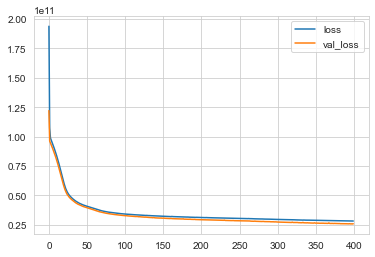

In [76]:
plt.figure(figsize= (10,8))
losses.plot()

In [77]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score

In [78]:
pred = model.predict(X_test)

In [79]:
mean_squared_error(y_test,pred)

25812026928.798653

In [80]:
mean_squared_error(y_test,pred)**0.5

160661.21787412994

In [81]:
mean_absolute_error(y_test,pred)

100560.74381389853

In [82]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [83]:
explained_variance_score(y_test,pred)

0.8058999526128777

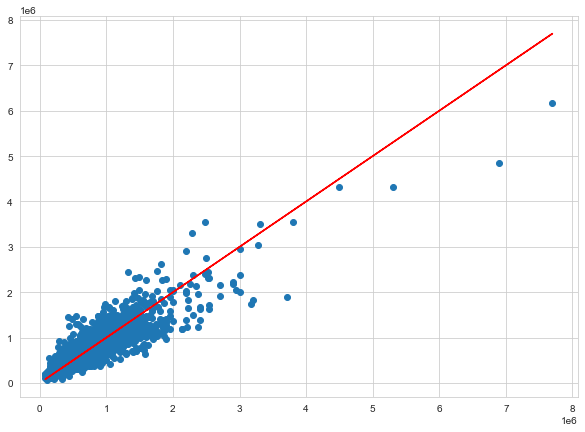

In [86]:
plt.figure(figsize= (10,7))
plt.scatter(y_test,pred)
plt.plot(y_test,y_test,'r')

In [87]:
single_house = df.drop('price',axis = 1).iloc[1]

In [88]:
single_house = scaler.transform(single_house.values.reshape(-1,19))

In [89]:
single_house

array([[0.2       , 0.28      , 0.22750776, 0.00407187, 0.4       ,
        0.        , 0.        , 0.5       , 0.4       , 0.23968043,
        0.08298755, 0.44347826, 0.98808933, 0.90895931, 0.16611296,
        0.22216486, 0.0081402 , 0.        , 1.        ]])

In [93]:
model.predict(single_house)

array([665375.1], dtype=float32)

In [94]:
df.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
